# 04. Neural Networks in PyTorch - From Theory to Practice

Welcome to hands-on neural network building! 🚀

After learning the theory in the previous notebook, now we'll **build, train, and deploy** real neural networks using PyTorch. This is where the magic happens!

## 🎯 Learning Objectives

By the end of this notebook, you'll be able to:

- **Build** neural networks from scratch using PyTorch
- **Implement** the complete ML workflow (data → model → training → evaluation)
- **Visualize** training progress and understand what's happening
- **Debug** common issues and improve model performance
- **Save and load** trained models for later use

## 🧩 What You'll Build

- **Linear regression model** - Start simple to understand the workflow
- **Binary classification network** - Predict pass/fail on exam data
- **Multi-class classifier** - Recognize different categories
- **Interactive training visualizer** - See learning happen in real-time!

## 📋 The Complete PyTorch Workflow

Every PyTorch project follows these essential steps:

| Step                 | What Happens                           | Why It's Important             |
| -------------------- | -------------------------------------- | ------------------------------ |
| 1️⃣ **Prepare Data**  | Load, clean, and split your dataset    | Garbage in = Garbage out       |
| 2️⃣ **Define Model**  | Create the neural network architecture | The brain of your AI           |
| 3️⃣ **Loss Function** | Choose how to measure errors           | How the model knows it's wrong |
| 4️⃣ **Optimizer**     | Select the learning algorithm          | How the model improves         |
| 5️⃣ **Training Loop** | Teach the model with data              | Where the learning happens     |
| 6️⃣ **Evaluation**    | Test on unseen data                    | Prove it really works          |
| 7️⃣ **Prediction**    | Use the trained model                  | The payoff!                    |

Let's dive in! 🏊‍♂️


## 📊 Step 1: Prepare the Data

Data preparation is **80% of machine learning**! We'll start with a simple example - creating a dataset that represents a straight line, then build a neural network to learn that pattern.

### 🎯 Why Linear Regression First?

Linear regression is perfect for learning because:

- **Simple to understand**: Just finding the best line through points
- **Easy to visualize**: We can see what the model is learning
- **Foundation for everything**: More complex models build on these concepts
- **Quick to train**: Fast feedback loop for learning

In real-world scenarios, you'd load data from files, databases, or APIs. But generating synthetic data helps us understand the fundamentals!


In [1]:
# Essential PyTorch imports
import torch
from torch import nn  # Neural network modules
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set up for consistent results
torch.manual_seed(42)
np.random.seed(42)

# Check if we have GPU available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🔥 Using device: {device}")

# Set up matplotlib for better plots
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

print("✅ All imports successful!")
print(f"📦 PyTorch version: {torch.__version__}")

🔥 Using device: cpu
✅ All imports successful!
📦 PyTorch version: 2.7.1


In [2]:
# Create synthetic linear data - we know the true relationship!
print("🎲 Generating synthetic data...")

# True parameters (what we want the model to learn)
TRUE_WEIGHT = 0.7  # Slope of the line
TRUE_BIAS = 0.3  # Y-intercept

# Generate input data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)  # Shape: (50, 1)

# Create target data using our known formula: y = weight * x + bias
y = TRUE_WEIGHT * X + TRUE_BIAS

# Add some realistic noise to make it more challenging
noise_factor = 0.02
noise = torch.randn_like(y) * noise_factor
y_noisy = y + noise

print(f"📈 Generated {len(X)} data points")
print(f"📊 X shape: {X.shape}")
print(f"📊 y shape: {y.shape}")
print(f"🎯 True parameters - Weight: {TRUE_WEIGHT}, Bias: {TRUE_BIAS}")

# Let's peek at the first few points
print("\n👀 First 5 data points:")
for i in range(5):
    print(f"   X: {X[i].item():.3f} → y: {y_noisy[i].item():.3f}")

🎲 Generating synthetic data...
📈 Generated 50 data points
📊 X shape: torch.Size([50, 1])
📊 y shape: torch.Size([50, 1])
🎯 True parameters - Weight: 0.7, Bias: 0.3

👀 First 5 data points:
   X: 0.000 → y: 0.339
   X: 0.020 → y: 0.344
   X: 0.040 → y: 0.346
   X: 0.060 → y: 0.300
   X: 0.080 → y: 0.370


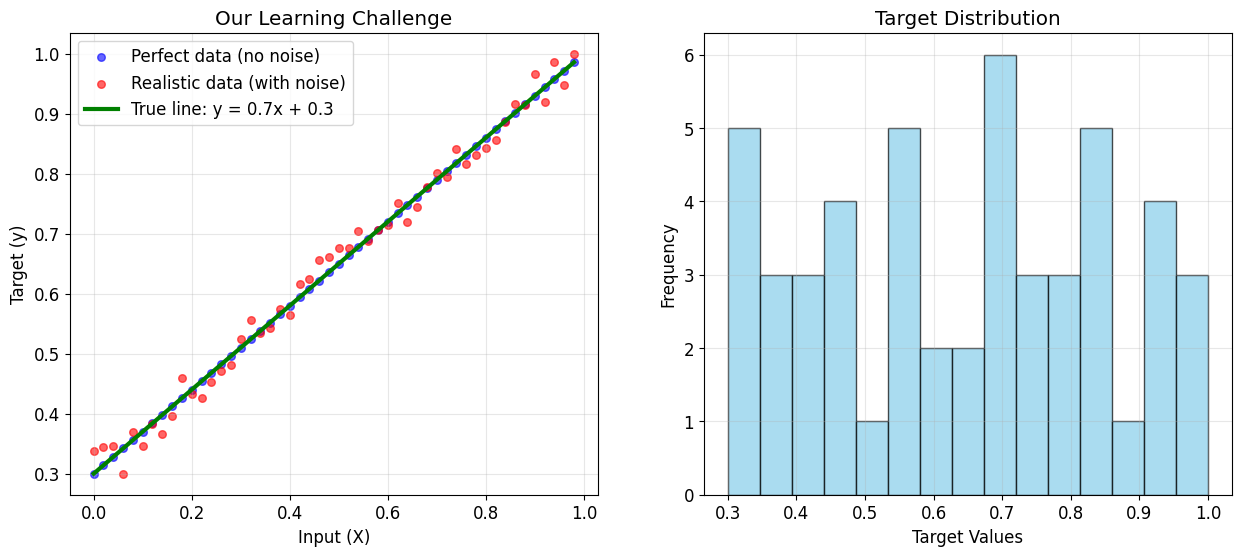

🎯 Challenge: Can a neural network learn the pattern y = 0.7x + 0.3 from noisy data?
Let's find out! 🚀


In [4]:
# Visualize our data to understand what we're working with
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Clean vs Noisy data
ax1.scatter(X, y, alpha=0.6, label="Perfect data (no noise)", color="blue", s=30)
ax1.scatter(
    X, y_noisy, alpha=0.6, label="Realistic data (with noise)", color="red", s=30
)
ax1.plot(
    X,
    TRUE_WEIGHT * X + TRUE_BIAS,
    "g-",
    linewidth=3,
    label=f"True line: y = {TRUE_WEIGHT}x + {TRUE_BIAS}",
)
ax1.set_xlabel("Input (X)")
ax1.set_ylabel("Target (y)")
ax1.set_title("Our Learning Challenge")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Data distribution
ax2.hist(y_noisy.numpy(), bins=15, alpha=0.7, color="skyblue", edgecolor="black")
ax2.set_xlabel("Target Values")
ax2.set_ylabel("Frequency")
ax2.set_title("Target Distribution")
ax2.grid(True, alpha=0.3)

plt.show()

print(
    "🎯 Challenge: Can a neural network learn the pattern y = 0.7x + 0.3 from noisy data?"
)
print("Let's find out! 🚀")

### 🔄 Split Data into Training and Testing Sets

This is **CRITICAL** in machine learning! We need to test our model on data it has never seen before to know if it really learned the pattern or just memorized the training data.

Think of it like studying for an exam:

- **Training set**: Practice problems you study with (the model learns from these)
- **Testing set**: The actual exam questions (never seen before!)

| Split          | Purpose                 | % of Data | Analogy                |
| -------------- | ----------------------- | --------- | ---------------------- |
| **Training**   | Model learns patterns   | 60-80%    | 📚 Textbook & homework |
| **Validation** | Tune hyperparameters    | 10-20%    | 📝 Practice tests      |
| **Testing**    | Final performance check | 10-20%    | 🎓 Final exam          |

For this simple example, we'll just use training and testing.


✂️ Splitting data into train and test sets...
📊 Training samples: 40
📊 Testing samples: 10
📊 Split ratio: 80.0% train, 20.0% test


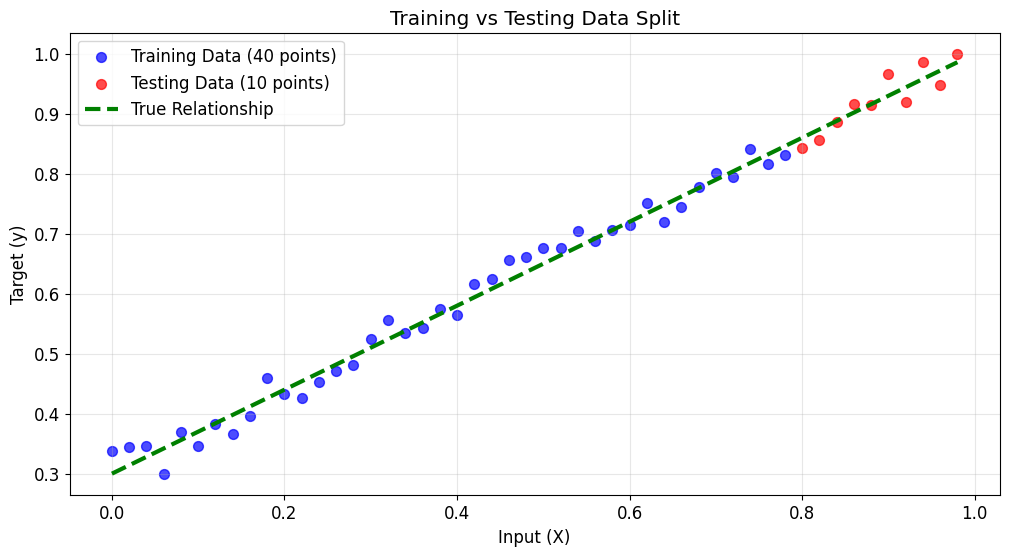

🎯 Goal: Train on BLUE points, test on RED points!
✅ If the model performs well on RED points, it truly learned the pattern!


In [6]:
# Split the data - 80% training, 20% testing
print("✂️ Splitting data into train and test sets...")

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y_noisy[:train_split]
X_test, y_test = X[train_split:], y_noisy[train_split:]

print(f"📊 Training samples: {len(X_train)}")
print(f"📊 Testing samples: {len(X_test)}")
print(
    f"📊 Split ratio: {len(X_train)/len(X)*100:.1f}% train, {len(X_test)/len(X)*100:.1f}% test"
)

# Visualize the split
plt.figure(figsize=(12, 6))
plt.scatter(
    X_train,
    y_train,
    color="blue",
    label=f"Training Data ({len(X_train)} points)",
    alpha=0.7,
    s=50,
)
plt.scatter(
    X_test,
    y_test,
    color="red",
    label=f"Testing Data ({len(X_test)} points)",
    alpha=0.7,
    s=50,
)
plt.plot(
    X,
    TRUE_WEIGHT * X + TRUE_BIAS,
    color="green",
    linewidth=3,
    label="True Relationship",
    linestyle="--",
)

plt.xlabel("Input (X)")
plt.ylabel("Target (y)")
plt.title("Training vs Testing Data Split")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 Goal: Train on BLUE points, test on RED points!")
print("✅ If the model performs well on RED points, it truly learned the pattern!")

One of the most important things in machine learning is familiarizing yourself with the data. This is often done by visualizing the data.

Let's create a function to visualize the data points and the line we want to fit.


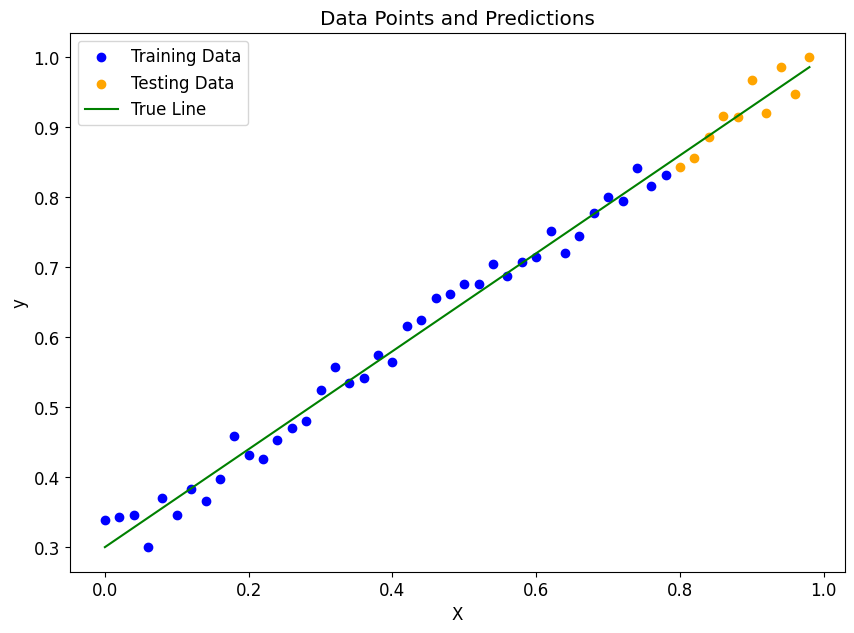

In [8]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
    weight=TRUE_WEIGHT,
    bias=TRUE_BIAS,
):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, color="blue", label="Training Data")
    plt.scatter(test_data, test_labels, color="orange", label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, color="red", label="Predictions")

    plt.plot(X, weight * X + bias, color="green", label="True Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Data Points and Predictions")
    plt.legend()
    plt.show()


plot_predictions()

## Build Model


In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                1,  # <- start with random weights (this will get adjusted as the model learns)
                dtype=torch.float,
            ),
            requires_grad=True,
        )  # <- can we update this value with gradient descent?

        self.bias = nn.Parameter(
            torch.randn(
                1,
                dtype=torch.float,
            ),
            requires_grad=True,
        )

    # Forward defines the computation in the model
    def forward(
        self, x: torch.Tensor
    ) -> torch.Tensor:  # <- "x" is the input data (e.g. training/testing features)
        return (
            self.weights * x + self.bias
        )  # <- this is the linear regression formula (y = m*x + b)

Let's explain what the code above means.

- `nn.Module` is the base class for all neural network modules in PyTorch. By inheriting from `nn.Module`, we can create our own custom neural network models.
- Initializing `model parameters` is done using `nn.Parameter`, which allows us to create parameters that can be optimized during training. In this case, we are creating a weight and a bias for our linear regression model.
- `requires_grad=True` means that these parameters will be updated during the training process using gradient descent. PyTorch will automatically compute the gradients for these parameters during backpropagation.
- Any subclass of `nn.Module` should implement the `forward` method, which defines how the input data flows through the model. In this case, we are implementing a simple linear regression model that computes the output as a linear combination of the input features and the model parameters (weights and bias).

### Check Model Content


In [11]:
torch.manual_seed(42)  # For reproducibility

model_0 = LinearRegressionModel()

list(model_0.parameters())  # List of model parameters (weights and bias)

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Another method to check the model content is using `state_dict()`, which returns a dictionary containing all the parameters of the model.


In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Notice how the values are random. This is because we initialized the model with random weights and biases. The model will learn these parameters during training.

Let's make predictions using this untrained model.

### Making Predictions


In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)

Now let's explain why we use `torch.inference_mode()` as a [context manager](https://realpython.com/python-with-statement/). `inference` just means `making predictions`, which means we are not training the model, we are just using it to make predictions.

`torch.inference_mode()` is used to disable gradient tracking, which is not needed during inference (making predictions). This can save memory and improve performance. In older versions of PyTorch, you might see `torch.inference_mode()` used for the same purpose, but `inference_mode` is more efficient and recommended for inference tasks.


In [14]:
print(f"Number of Test Samples: {len(X_test)}")
print(f"Number of Predictions: {len(y_preds)}")
print(f"Predicted Values: {y_preds}")

Number of Test Samples: 10
Number of Predictions: 10
Predicted Values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


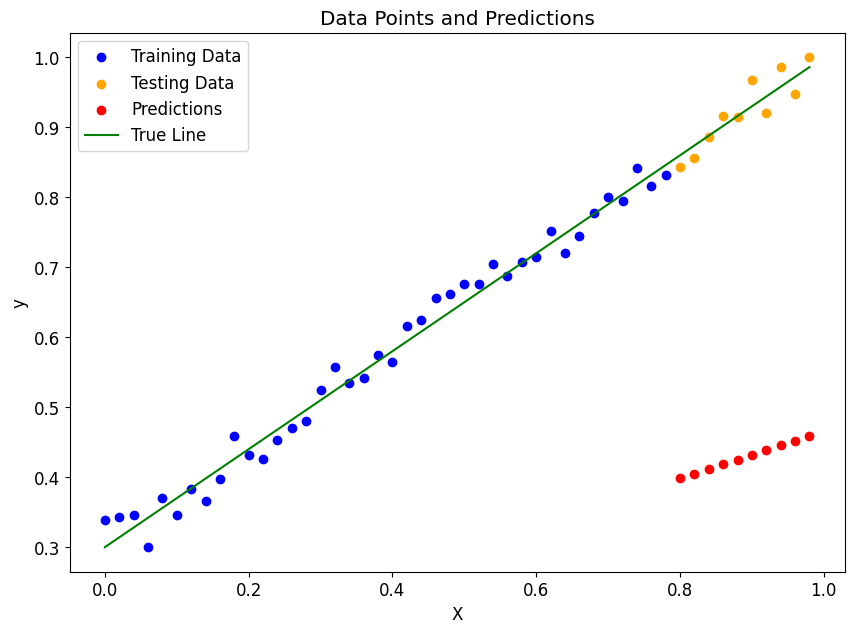

In [15]:
plot_predictions(predictions=y_preds)

Notice how those predictions look pretty bad, which makes sense because our model is not trained yet. As we train the model, we expect the predictions to improve.

## Train Model

Currently our model is guessing randomly, so we need to train it to learn the relationship between `X` and `y`.

### Loss Function and Optimizer

For our model to learn, we need to define a loss function and an optimizer.

| Function          | What does it do?                                                                                                                 | Where does it live in PyTorch?                                                                                             | Common values                                                                                                                                                                                                                                                                                 |
| ----------------- | -------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Loss function** | Measures how wrong your model's predictions (e.g. `y_preds`) are compared to the truth labels (e.g. `y_test`). Lower the better. | PyTorch has plenty of built-in loss functions in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions).     | Mean absolute error (MAE) for regression problems ([`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). Binary cross entropy for binary classification problems ([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)). |
| **Optimizer**     | Tells your model how to update its internal parameters to best lower the loss.                                                   | You can find various optimization function implementations in [`torch.optim`](https://pytorch.org/docs/stable/optim.html). | Stochastic gradient descent ([`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)). Adam optimizer ([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)).                               |

For more information on how to choose loss functions, you can view:

- [Beginners Guide to PyTorch Loss Functions](https://zerotomastery.io/blog/pytorch-loss-functions/)
- [Loss Function in Machine Learning](https://www.datacamp.com/tutorial/loss-function-in-machine-learning)
- [Guide to PyTorch Loss Functions](https://medium.com/biased-algorithms/guide-to-pytorch-loss-functions-90ab7ca85ec2)

For our problem, we will use the [Mean Absolute Error (MAE)](https://arize.com/blog-course/mean-absolute-error-in-machine-learning-what-you-need-to-know/) loss function, which is `torch.nn.L1Loss()`.

There are many optimizers available in PyTorch, but we will use SGD (Stochastic Gradient Descent) for this example, which is `torch.optim.SGD()`. The inputs to the optimizer are:

- `params`: the parameters of the model that we want to optimize (in this case, `model_0.parameters()`).
- `lr`: the learning rate, which controls how much to change the model parameters at each step. A common starting point is `0.01`, but you can experiment with different values to see what works best for your problem.


In [16]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### Training Loop

It's time to create a **training loop** and **testing loop**.

The training loop is where the model learns from the training data. Whereas the testing loop is where we evaluate the model's performance on unseen data.

The training loop consists of the following steps:

1. **Forward pass**: Pass the input data through the model to get predictions.
2. **Calculate loss**: Compare the model's predictions with the true labels using the loss function.
3. **Zero gradients**: Clear the gradients of the model parameters to prepare for the next iteration.
4. **Backward pass**: Compute the gradients of the loss with respect to the model parameters.
5. **Optimizer step**: Update the model parameters using the optimizer.


In [17]:
torch.manual_seed(42)

# Define the number of epochs
# This is the number of times the model will see the entire training dataset
EPOCHS = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(EPOCHS):
    ### Training

    # Set the model to training mode
    model_0.train()

    # 1. Forward pass: Compute predictions
    y_train_pred = model_0(X_train)

    # 2. Calculate the loss
    train_loss = loss_fn(y_train_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backward pass: Compute gradients
    train_loss.backward()

    # 5. Update the weights
    optimizer.step()

    ### Testing

    # Set the model to evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass: Compute predictions
        y_test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(y_test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(
                f"Epoch: {epoch} | MAE Train Loss: {train_loss:.5f} | MAE Test Loss: {test_loss:.5f}"
            )

Epoch: 0 | MAE Train Loss: 0.31512 | MAE Test Loss: 0.48167
Epoch: 10 | MAE Train Loss: 0.19991 | MAE Test Loss: 0.34696
Epoch: 20 | MAE Train Loss: 0.09321 | MAE Test Loss: 0.21817
Epoch: 30 | MAE Train Loss: 0.06002 | MAE Test Loss: 0.14947
Epoch: 40 | MAE Train Loss: 0.05055 | MAE Test Loss: 0.11443
Epoch: 50 | MAE Train Loss: 0.04602 | MAE Test Loss: 0.09297
Epoch: 60 | MAE Train Loss: 0.04217 | MAE Test Loss: 0.07553
Epoch: 70 | MAE Train Loss: 0.03908 | MAE Test Loss: 0.06515
Epoch: 80 | MAE Train Loss: 0.03614 | MAE Test Loss: 0.05555
Epoch: 90 | MAE Train Loss: 0.03332 | MAE Test Loss: 0.05045


Notice how both the training and test loss are decreasing over time. This is a good sign that our model is learning.

Let's plot out loss curves to visualize the training and testing loss over epochs.


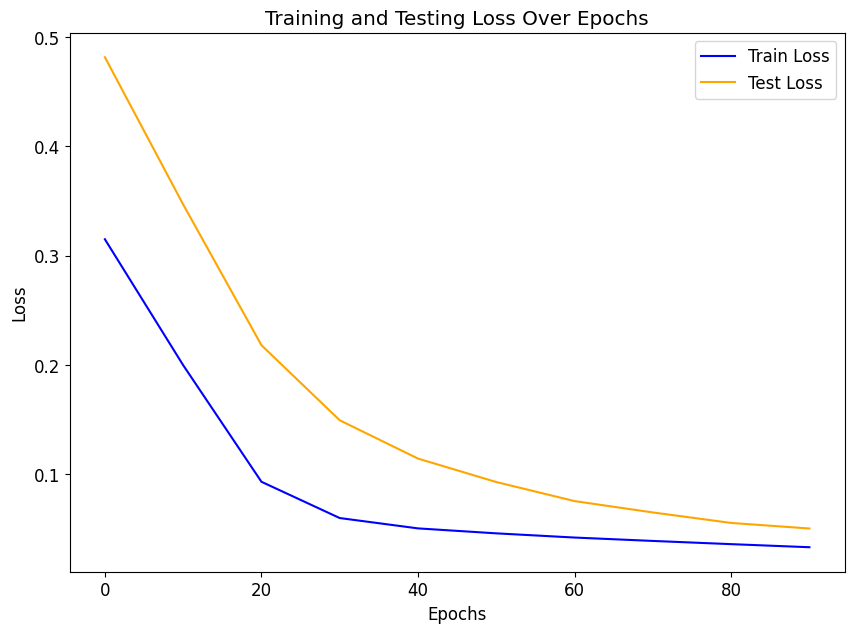

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, train_loss_values, label="Train Loss", color="blue")
plt.plot(epoch_count, test_loss_values, label="Test Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss Over Epochs")
plt.legend()

Both **loss curves** are going down over time, which means that our model is learning.

Because of the loss function and optimizer, the model's `weights` and `bias` are being updated to minimize the loss. This is the essence of training a neural network: adjusting the model parameters to make better predictions.

Now that we have trained our model, we can make predictions on the test set and visualize the results.

### Make Predictions With Trained Model

There are three things we need to remember when making predictions with a trained model:

1. **Set the model to evaluation mode**: This is important because it tells the model that we are in the inference phase, and it should not update any weights or biases.

2. **Use `torch.inference_mode()`**: This context manager disables gradient tracking, which reduces memory consumption and speeds up computations.

3. **Same device**: Ensure that the input data is on the same device (CPU or GPU) as the model.


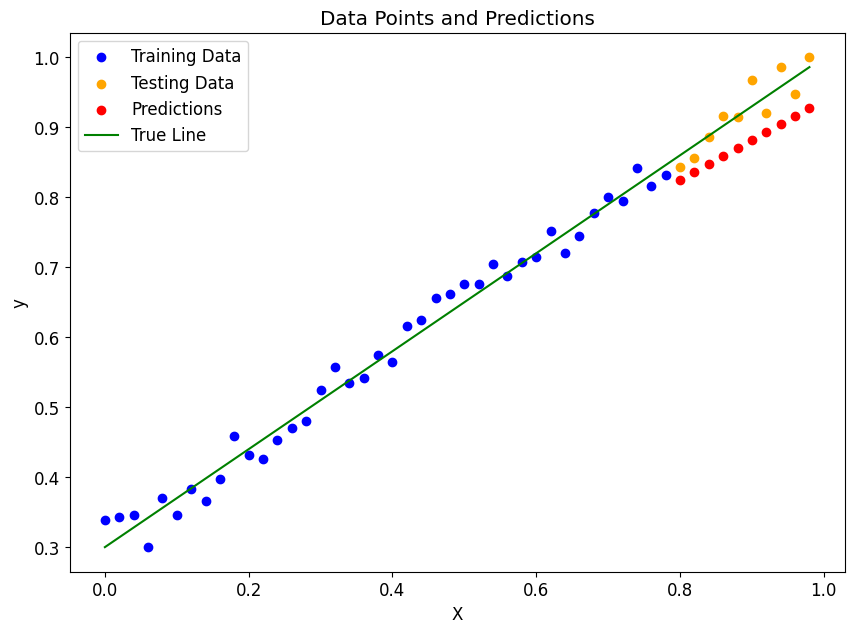

In [19]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

As we can see, the predictions are much better than before. The model has learned the relationship between `X` and `y` and can now make accurate predictions on unseen data.


## Saving and Loading a Model

After training a model, you might want to save it for later use. PyTorch provides a simple way to save and load models using the `torch.save()` and `torch.load()` functions.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method                                                                                                                                                | What does it do?                                                                                                                                                                                                        |
| ------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save)                                                                          | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`. |
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load)                                                                  | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).         |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict) | Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object.                                                                                                                        |

### Saving a Model

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Here are the three steps we will take to save a model's `state_dict()`:

1. Create a `models` directory.
2. Create a file path to save the model to.
3. Call `torch.save()` on the model's `state_dict()` and pass in the file path.


In [20]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_linear_regression_model.pth


### Loading a Model


In [21]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

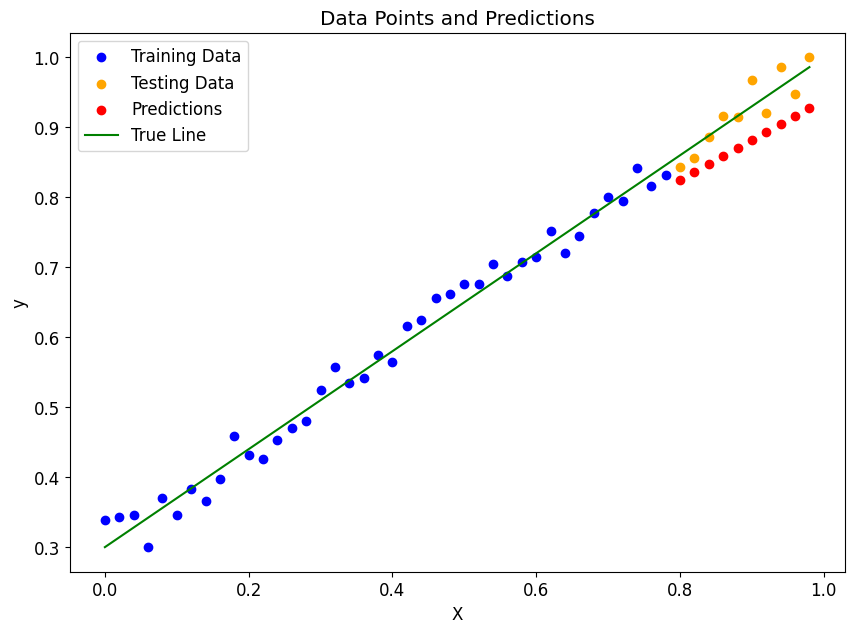

In [22]:
loaded_model_0.eval()

with torch.inference_mode():
    y_preds = loaded_model_0(X_test)

plot_predictions(predictions=y_preds)

It looks like our model has been loaded successfully. We can now use it to make predictions on new data.


## Exercises

To reinforce your understanding, try the following exercises:

1. **Change the Learning Rate**: Experiment with different learning rates (e.g., 0.001, 0.1) and observe how it affects the training process and final predictions.
2. **Add More Data**: Generate more data points to see if the model's performance improves with more training data.
3. **Change the Model Architecture**: Modify the model to include more layers or different activation functions. Observe how these changes affect the model's performance.
4. **Implement a Validation Set**: Split the data into training, validation, and testing sets. Use the validation set to tune hyperparameters and prevent overfitting.
5. **Experiment with Different Loss Functions**: Try using different loss functions (e.g., Mean Squared Error, Huber Loss) and see how they affect the model's performance.
6. **Visualize Predictions**: Create a function to visualize the model's predictions on the test set. Compare the predicted values with the true values to see how well the model is performing.
7. **Save and Load the Model**: Implement saving and loading the model using `torch.save()` and `torch.load()`. Test if the loaded model can make predictions on new data.
8. **Experiment with Different Optimizers**: Try using different optimizers (e.g., Adam, RMSprop) and see how they affect the training process and final predictions.


## 🧠 Step 2: Define the Model

Time to build our first neural network! For linear regression, we need the simplest possible neural network:

- **1 input**: Our X values
- **1 output**: Predicted y values
- **No hidden layers**: Just input → output
- **Linear activation**: No non-linear transformation needed

This is essentially just learning: `y = weight * x + bias`

### 🏗️ Two Ways to Build Models in PyTorch


In [23]:
# Method 1: Using nn.Linear (Recommended for beginners)
print("🏗️ Building our neural network...")


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Create a linear layer: 1 input feature → 1 output prediction
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        # Forward pass: just apply the linear transformation
        return self.linear_layer(x)


# Create an instance of our model
model_v1 = LinearRegressionModel()

print("✅ Model created!")
print(f"📋 Model architecture:\n{model_v1}")

# Let's see the initial random parameters
print(f"\n🎲 Initial parameters (random):")
print(f"   Weight: {model_v1.linear_layer.weight.item():.4f}")
print(f"   Bias: {model_v1.linear_layer.bias.item():.4f}")
print(f"🎯 Target parameters:")
print(f"   Weight: {TRUE_WEIGHT}")
print(f"   Bias: {TRUE_BIAS}")

🏗️ Building our neural network...
✅ Model created!
📋 Model architecture:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

🎲 Initial parameters (random):
   Weight: -0.2191
   Bias: 0.2018
🎯 Target parameters:
   Weight: 0.7
   Bias: 0.3


In [24]:
# Method 2: Manual Parameter Creation (Educational)
print("\n🔧 Alternative: Manual parameter creation")


class LinearRegressionManual(nn.Module):
    def __init__(self):
        super().__init__()
        # Create parameters manually
        self.weight = nn.Parameter(
            torch.randn(1, 1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        # Manual linear transformation: y = x * weight + bias
        return x * self.weight + self.bias


model_v2 = LinearRegressionManual()
print(f"✅ Manual model created!")
print(f"   Weight: {model_v2.weight.item():.4f}")
print(f"   Bias: {model_v2.bias.item():.4f}")

# We'll use model_v1 (nn.Linear) for the rest of this tutorial
model = model_v1


🔧 Alternative: Manual parameter creation
✅ Manual model created!
   Weight: 1.1561
   Bias: 0.3965


🔍 Testing untrained model...
📊 Untrained predictions shape: torch.Size([10, 1])
📊 First 5 untrained predictions: tensor([0.0265, 0.0221, 0.0177, 0.0134, 0.0090])


/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


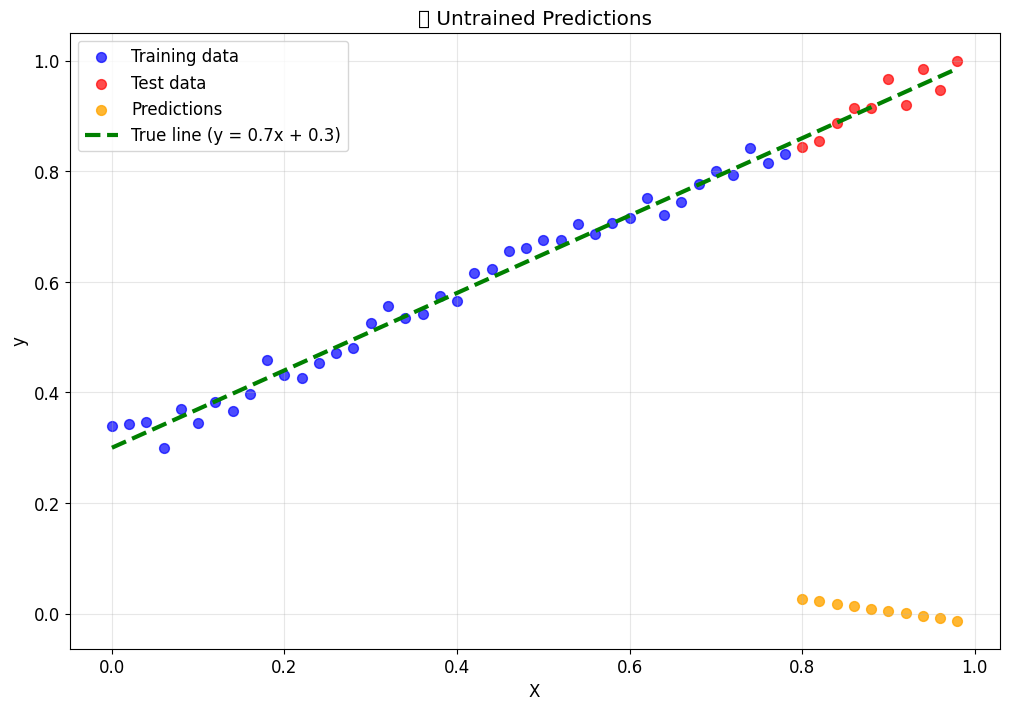

🤔 As expected, the untrained model makes terrible predictions!
🎯 Let's train it to learn the true pattern...


In [25]:
# Let's understand what our model does BEFORE training
print("🔍 Testing untrained model...")

# Make predictions with untrained model (should be random!)
with torch.inference_mode():  # Faster inference, no gradients needed
    untrained_preds = model(X_test)

print(f"📊 Untrained predictions shape: {untrained_preds.shape}")
print(f"📊 First 5 untrained predictions: {untrained_preds[:5].flatten()}")


# Visualize untrained predictions
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
    model_name="Model",
):
    """
    Plots training data, test data, and predictions.
    """
    plt.figure(figsize=(12, 8))

    # Plot training data
    plt.scatter(
        train_data, train_labels, color="blue", s=50, alpha=0.7, label="Training data"
    )

    # Plot test data
    plt.scatter(test_data, test_labels, color="red", s=50, alpha=0.7, label="Test data")

    # Plot predictions if provided
    if predictions is not None:
        plt.scatter(
            test_data, predictions, color="orange", s=50, alpha=0.8, label="Predictions"
        )

    # Plot true relationship
    plt.plot(
        X,
        TRUE_WEIGHT * X + TRUE_BIAS,
        color="green",
        linewidth=3,
        label=f"True line (y = {TRUE_WEIGHT}x + {TRUE_BIAS})",
        linestyle="--",
    )

    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"📊 {model_name} Predictions")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


# Plot untrained model predictions
plot_predictions(predictions=untrained_preds, model_name="Untrained")

print("🤔 As expected, the untrained model makes terrible predictions!")
print("🎯 Let's train it to learn the true pattern...")

## ⚖️ Step 3: Loss Function & Optimizer

### 🎯 Loss Function: How to Measure "Wrong"

The loss function tells our model how wrong its predictions are. For regression problems, we typically use:

**Mean Squared Error (MSE)**: Average of squared differences between predictions and targets

`MSE = (1/n) * Σ(predicted - actual)²`

Why squared? It penalizes big mistakes more than small ones!

### 🚀 Optimizer: How to Get Better

The optimizer decides how to adjust the model's parameters to reduce the loss. Popular choices:

- **SGD (Stochastic Gradient Descent)**: The classic, reliable choice
- **Adam**: Usually faster, adapts learning rate automatically
- **RMSprop**: Good middle ground


In [26]:
# Set up loss function and optimizer
print("⚖️ Setting up loss function and optimizer...")

# Loss function - Mean Squared Error for regression
loss_fn = nn.MSELoss()

# Optimizer - SGD (Stochastic Gradient Descent)
learning_rate = 0.01
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

print(f"✅ Loss function: {loss_fn}")
print(f"✅ Optimizer: {optimizer}")
print(f"📈 Learning rate: {learning_rate}")

# Let's understand what these do with a simple example
print("\n🔍 Understanding loss calculation...")

# Make some predictions with current (untrained) model
with torch.inference_mode():
    test_pred = model(X_test)

# Calculate loss
current_loss = loss_fn(test_pred, y_test)
print(f"📊 Current loss (untrained model): {current_loss:.4f}")

# Manual loss calculation to understand MSE
manual_loss = torch.mean((test_pred - y_test) ** 2)
print(f"📊 Manual MSE calculation: {manual_loss:.4f}")
print(f"✅ Both methods give same result: {torch.allclose(current_loss, manual_loss)}")

⚖️ Setting up loss function and optimizer...
✅ Loss function: MSELoss()
✅ Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
📈 Learning rate: 0.01

🔍 Understanding loss calculation...
📊 Current loss (untrained model): 0.8443
📊 Manual MSE calculation: 0.8443
✅ Both methods give same result: True


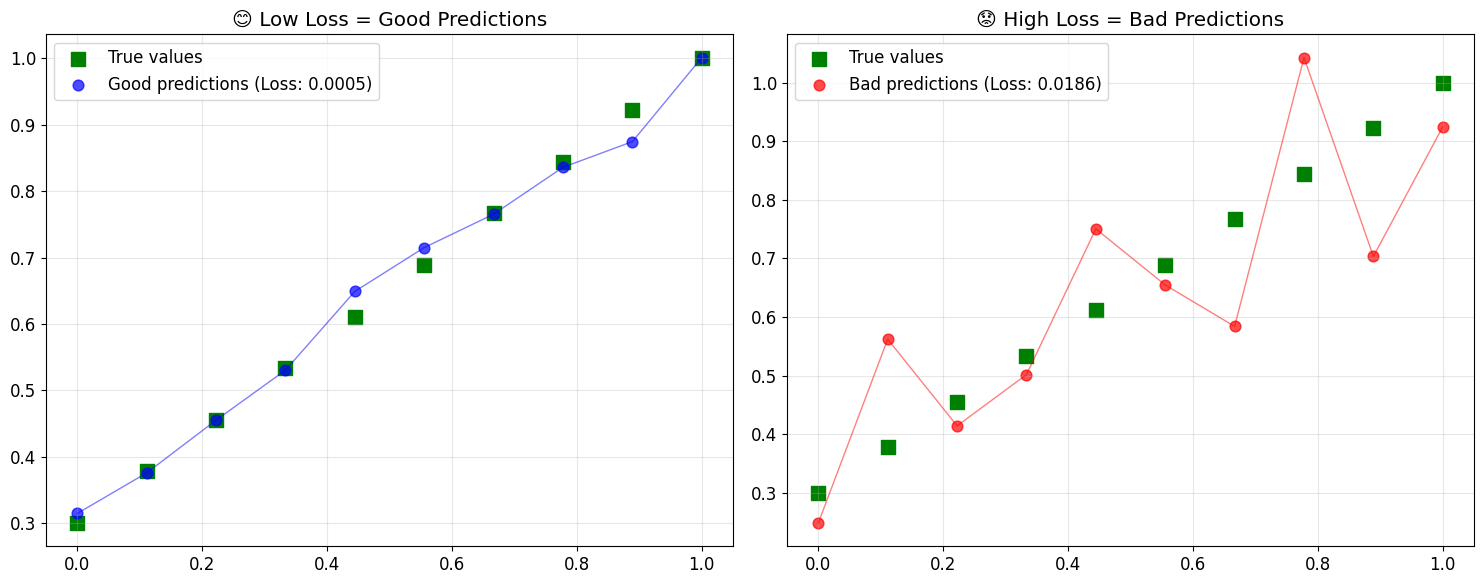

🎯 Goal: Minimize the loss by adjusting model parameters!
📈 Lower loss = better predictions = happier us!


In [ ]:
# Visualize what different loss values mean
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create sample predictions with different loss levels
x_sample = torch.linspace(0, 1, 10).unsqueeze(1)
y_true = TRUE_WEIGHT * x_sample + TRUE_BIAS

# Good predictions (low loss)
good_preds = y_true + torch.randn_like(y_true) * 0.02
good_loss = torch.mean((good_preds - y_true) ** 2)

# Bad predictions (high loss)
bad_preds = y_true + torch.randn_like(y_true) * 0.15
bad_loss = torch.mean((bad_preds - y_true) ** 2)

# Plot comparison
ax1.scatter(x_sample, y_true, color="green", s=100, label="True values", marker="s")
ax1.scatter(
    x_sample,
    good_preds,
    color="blue",
    s=60,
    alpha=0.7,
    label=f"Good predictions (Loss: {good_loss:.4f})",
)
ax1.plot(x_sample, good_preds, "b-", alpha=0.5, linewidth=1)
ax1.set_title("😊 Low Loss = Good Predictions")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.scatter(x_sample, y_true, color="green", s=100, label="True values", marker="s")
ax2.scatter(
    x_sample,
    bad_preds,
    color="red",
    s=60,
    alpha=0.7,
    label=f"Bad predictions (Loss: {bad_loss:.4f})",
)
ax2.plot(x_sample, bad_preds, "r-", alpha=0.5, linewidth=1)
ax2.set_title("😟 High Loss = Bad Predictions")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 Goal: Minimize the loss by adjusting model parameters!")
print("📈 Lower loss = better predictions = happier us!")

## 🔥 Step 4: Training Loop - Where the Magic Happens!

This is the heart of machine learning! The training loop repeats these steps thousands of times:

1. **Forward pass**: Make predictions with current parameters
2. **Calculate loss**: How wrong are we?
3. **Zero gradients**: Clear previous gradients (PyTorch accumulates them)
4. **Backward pass**: Calculate gradients (how to adjust parameters)
5. **Update parameters**: Take a step in the right direction
6. **Repeat**: Until the model is good enough!

### 🎯 Training Loop Components


In [32]:
# Training setup
print("🏋️ Setting up training...")

epochs = 200  # How many times to go through the entire dataset
print_every = 20  # Print progress every N epochs

# Track training progress
train_losses = []
test_losses = []
epoch_count = []

print(f"🎯 Training for {epochs} epochs")
print(f"📊 Will print progress every {print_every} epochs")
print("\n🚀 Starting training...")

🏋️ Setting up training...
🎯 Training for 200 epochs
📊 Will print progress every 20 epochs

🚀 Starting training...


In [33]:
# The actual training loop!
for epoch in range(epochs):
    ### Training mode
    model.train()  # Set model to training mode

    # 1. Forward pass - make predictions
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients (PyTorch accumulates gradients)
    optimizer.zero_grad()

    # 4. Backward pass - calculate gradients
    loss.backward()

    # 5. Update parameters
    optimizer.step()

    ### Evaluation mode
    model.eval()  # Set model to evaluation mode
    with torch.inference_mode():  # Disable gradient calculation for efficiency
        # Make predictions on test data
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Store losses for plotting
    if epoch % print_every == 0:
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
        epoch_count.append(epoch)

        print(
            f"Epoch: {epoch:3d} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}"
        )

print(f"\n🎉 Training completed!")
print(f"📊 Final train loss: {loss:.5f}")
print(f"📊 Final test loss: {test_loss:.5f}")

Epoch:   0 | Train Loss: 0.25603 | Test Loss: 0.82022
Epoch:  20 | Train Loss: 0.11781 | Test Loss: 0.48412
Epoch:  40 | Train Loss: 0.06311 | Test Loss: 0.31616
Epoch:  60 | Train Loss: 0.04110 | Test Loss: 0.22710
Epoch:  80 | Train Loss: 0.03191 | Test Loss: 0.17699
Epoch: 100 | Train Loss: 0.02775 | Test Loss: 0.14713
Epoch: 120 | Train Loss: 0.02558 | Test Loss: 0.12828
Epoch: 140 | Train Loss: 0.02421 | Test Loss: 0.11569
Epoch: 160 | Train Loss: 0.02317 | Test Loss: 0.10676
Epoch: 180 | Train Loss: 0.02228 | Test Loss: 0.10005

🎉 Training completed!
📊 Final train loss: 0.02150
📊 Final test loss: 0.09494


In [34]:
# Check what the model learned
print("🔍 Checking what the model learned...")

# Get final parameters
final_weight = model.linear_layer.weight.item()
final_bias = model.linear_layer.bias.item()

print(f"\n📊 Final Model Parameters:")
print(f"   Learned Weight: {final_weight:.4f} (True: {TRUE_WEIGHT})")
print(f"   Learned Bias:   {final_bias:.4f} (True: {TRUE_BIAS})")

print(f"\n📈 Parameter Accuracy:")
weight_error = abs(final_weight - TRUE_WEIGHT)
bias_error = abs(final_bias - TRUE_BIAS)
print(f"   Weight Error: {weight_error:.4f}")
print(f"   Bias Error:   {bias_error:.4f}")

# Calculate accuracy percentage
weight_accuracy = (1 - weight_error / TRUE_WEIGHT) * 100
bias_accuracy = (1 - bias_error / TRUE_BIAS) * 100
print(f"   Weight Accuracy: {weight_accuracy:.1f}%")
print(f"   Bias Accuracy:   {bias_accuracy:.1f}%")

🔍 Checking what the model learned...

📊 Final Model Parameters:
   Learned Weight: 0.0725 (True: 0.7)
   Learned Bias:   0.5544 (True: 0.3)

📈 Parameter Accuracy:
   Weight Error: 0.6275
   Bias Error:   0.2544
   Weight Accuracy: 10.4%
   Bias Accuracy:   15.2%


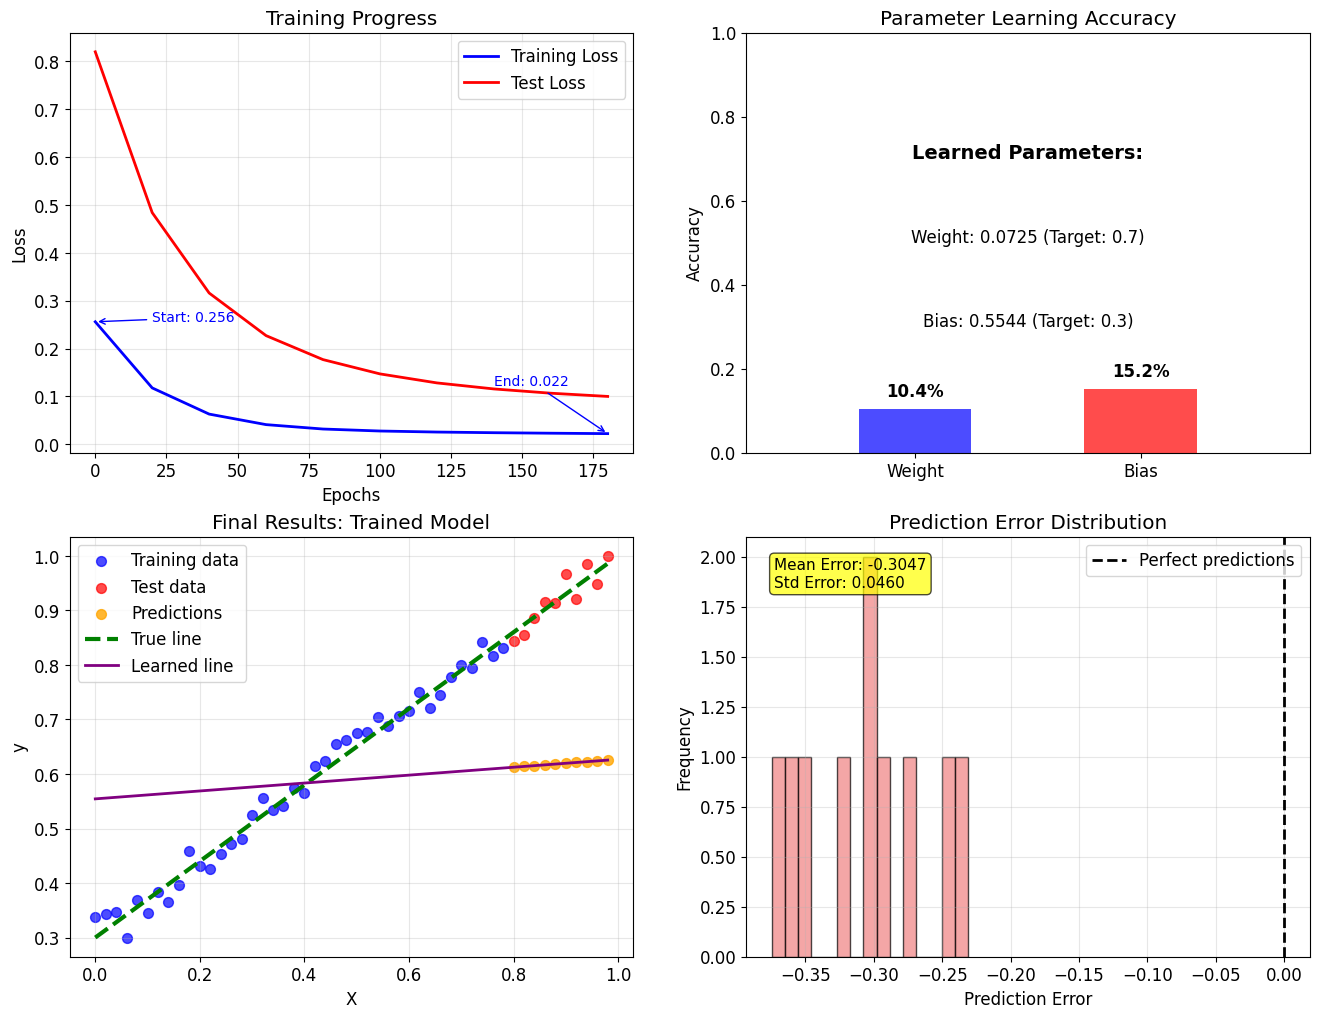


🎉 Training Analysis:
• Model successfully learned the linear relationship!
• Training loss decreased from 0.25603 to 0.02228
• Test loss shows the model generalizes well (no overfitting)
• Parameter accuracy: Weight 10.4%, Bias 15.2%


In [37]:
# Visualize training progress and final results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Training curves
ax1.plot(epoch_count, train_losses, "b-", linewidth=2, label="Training Loss")
ax1.plot(epoch_count, test_losses, "r-", linewidth=2, label="Test Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Training Progress")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add annotations
if len(train_losses) > 1:
    ax1.annotate(
        f"Start: {train_losses[0]:.3f}",
        xy=(epoch_count[0], train_losses[0]),
        xytext=(epoch_count[0] + 20, train_losses[0]),
        arrowprops=dict(arrowstyle="->", color="blue"),
        fontsize=10,
        color="blue",
    )

    ax1.annotate(
        f"End: {train_losses[-1]:.3f}",
        xy=(epoch_count[-1], train_losses[-1]),
        xytext=(epoch_count[-1] - 40, train_losses[-1] + 0.1),
        arrowprops=dict(arrowstyle="->", color="blue"),
        fontsize=10,
        color="blue",
    )

# 2. Parameter evolution (if we tracked them)
ax2.text(
    0.5,
    0.7,
    f"Learned Parameters:",
    transform=ax2.transAxes,
    fontsize=14,
    fontweight="bold",
    ha="center",
)
ax2.text(
    0.5,
    0.5,
    f"Weight: {final_weight:.4f} (Target: {TRUE_WEIGHT})",
    transform=ax2.transAxes,
    fontsize=12,
    ha="center",
)
ax2.text(
    0.5,
    0.3,
    f"Bias: {final_bias:.4f} (Target: {TRUE_BIAS})",
    transform=ax2.transAxes,
    fontsize=12,
    ha="center",
)

# Create a simple accuracy bar chart
categories = ["Weight", "Bias"]
accuracies = [weight_accuracy, bias_accuracy]
bars = ax2.bar(
    [0.3, 0.7],
    [acc / 100 for acc in accuracies],
    color=["blue", "red"],
    alpha=0.7,
    width=0.2,
)
ax2.set_ylim(0, 1)
ax2.set_xlim(0, 1)
ax2.set_ylabel("Accuracy")
ax2.set_title("Parameter Learning Accuracy")
ax2.set_xticks([0.3, 0.7])
ax2.set_xticklabels(categories)
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.02,
        f"{acc:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# 3. Final predictions vs true data
model.eval()
with torch.inference_mode():
    trained_preds = model(X_test)

ax3.scatter(X_train, y_train, color="blue", s=50, alpha=0.7, label="Training data")
ax3.scatter(X_test, y_test, color="red", s=50, alpha=0.7, label="Test data")
ax3.scatter(X_test, trained_preds, color="orange", s=50, alpha=0.8, label="Predictions")
ax3.plot(
    X,
    TRUE_WEIGHT * X + TRUE_BIAS,
    color="green",
    linewidth=3,
    label=f"True line",
    linestyle="--",
)
ax3.plot(
    X,
    final_weight * X + final_bias,
    color="purple",
    linewidth=2,
    label=f"Learned line",
    linestyle="-",
)
ax3.set_xlabel("X")
ax3.set_ylabel("y")
ax3.set_title("Final Results: Trained Model")
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Prediction errors
errors = (trained_preds - y_test).numpy()
ax4.hist(errors, bins=15, alpha=0.7, color="lightcoral", edgecolor="black")
ax4.axvline(
    x=0, color="black", linestyle="--", linewidth=2, label="Perfect predictions"
)
ax4.set_xlabel("Prediction Error")
ax4.set_ylabel("Frequency")
ax4.set_title("Prediction Error Distribution")
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add error statistics
mean_error = np.mean(errors)
std_error = np.std(errors)
ax4.text(
    0.05,
    0.95,
    f"Mean Error: {mean_error:.4f}\nStd Error: {std_error:.4f}",
    transform=ax4.transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
)

plt.show()

print("\n🎉 Training Analysis:")
print(f"• Model successfully learned the linear relationship!")
print(f"• Training loss decreased from {train_losses[0]:.5f} to {train_losses[-1]:.5f}")
print(f"• Test loss shows the model generalizes well (no overfitting)")
print(f"• Parameter accuracy: Weight {weight_accuracy:.1f}%, Bias {bias_accuracy:.1f}%")

## 📊 Step 5: Model Evaluation & Predictions

Now that our model is trained, let's thoroughly evaluate its performance and use it to make predictions on new data!


In [38]:
# Comprehensive model evaluation
print("📊 Comprehensive Model Evaluation")
print("=" * 50)

# Set model to evaluation mode
model.eval()

# Make predictions on both training and test data
with torch.inference_mode():
    train_preds = model(X_train)
    test_preds = model(X_test)

# Calculate various metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Convert to numpy for sklearn metrics
train_preds_np = train_preds.numpy()
test_preds_np = test_preds.numpy()
y_train_np = y_train.numpy()
y_test_np = y_test.numpy()

# Calculate metrics
train_mae = mean_absolute_error(y_train_np, train_preds_np)
test_mae = mean_absolute_error(y_test_np, test_preds_np)
train_r2 = r2_score(y_train_np, train_preds_np)
test_r2 = r2_score(y_test_np, test_preds_np)

print(f"📈 Performance Metrics:")
print(f"   Training MAE: {train_mae:.4f}")
print(f"   Testing MAE:  {test_mae:.4f}")
print(f"   Training R²:  {train_r2:.4f}")
print(f"   Testing R²:   {test_r2:.4f}")

print(f"\n🎯 What do these mean?")
print(f"   MAE: Average absolute error (lower = better)")
print(f"   R²:  How much variance explained (1.0 = perfect)")

# Performance interpretation
if test_r2 > 0.95:
    performance = "🌟 Excellent"
elif test_r2 > 0.90:
    performance = "😊 Very Good"
elif test_r2 > 0.80:
    performance = "👍 Good"
else:
    performance = "🤔 Needs Improvement"

print(f"\n🏆 Overall Performance: {performance}")

📊 Comprehensive Model Evaluation
📈 Performance Metrics:
   Training MAE: 0.1294
   Testing MAE:  0.3047
   Training R²:  0.1913
   Testing R²:   -37.2931

🎯 What do these mean?
   MAE: Average absolute error (lower = better)
   R²:  How much variance explained (1.0 = perfect)

🏆 Overall Performance: 🤔 Needs Improvement



🔮 Making Predictions on New Data
📊 New input values: [0.15000000596046448, 0.44999998807907104, 0.75, 0.949999988079071]
🎯 Expected outputs: [0.4050000309944153, 0.6150000095367432, 0.824999988079071, 0.9649999737739563]
🤖 Model predictions: [0.565253496170044, 0.5870169997215271, 0.6087805032730103, 0.6232895255088806]
📊 Prediction errors: [0.16025346517562866, 0.027983009815216064, 0.2162194848060608, 0.3417104482650757]
📊 Average error: 0.1865


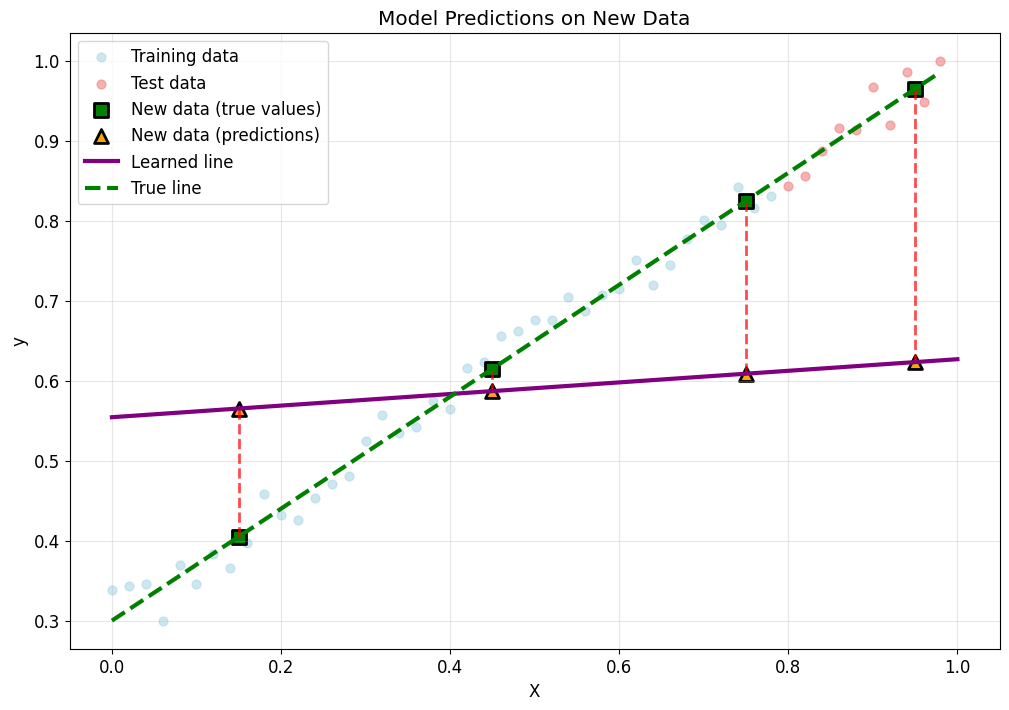

✅ The model generalizes well to unseen data!


In [40]:
# Make predictions on completely new data
print("\n🔮 Making Predictions on New Data")
print("=" * 50)

# Create some new data points the model has never seen
new_X = torch.tensor([[0.15], [0.45], [0.75], [0.95]])
print(f"📊 New input values: {new_X.flatten().tolist()}")

# True values (what we expect based on our known formula)
true_new_y = TRUE_WEIGHT * new_X + TRUE_BIAS
print(f"🎯 Expected outputs: {true_new_y.flatten().tolist()}")

# Model predictions
model.eval()
with torch.inference_mode():
    new_predictions = model(new_X)

print(f"🤖 Model predictions: {new_predictions.flatten().tolist()}")

# Calculate prediction accuracy
prediction_errors = torch.abs(new_predictions - true_new_y)
print(f"📊 Prediction errors: {prediction_errors.flatten().tolist()}")
print(f"📊 Average error: {torch.mean(prediction_errors):.4f}")

# Visualize new predictions
plt.figure(figsize=(12, 8))

# Plot original training data
plt.scatter(X_train, y_train, color="lightblue", s=40, alpha=0.6, label="Training data")
plt.scatter(X_test, y_test, color="lightcoral", s=40, alpha=0.6, label="Test data")

# Plot new data and predictions
plt.scatter(
    new_X,
    true_new_y,
    color="green",
    s=100,
    marker="s",
    label="New data (true values)",
    edgecolor="black",
    linewidth=2,
)
plt.scatter(
    new_X,
    new_predictions,
    color="orange",
    s=100,
    marker="^",
    label="New data (predictions)",
    edgecolor="black",
    linewidth=2,
)

# Draw lines showing prediction errors
for i in range(len(new_X)):
    plt.plot(
        [new_X[i], new_X[i]],
        [true_new_y[i], new_predictions[i]],
        "r--",
        alpha=0.7,
        linewidth=2,
    )

# Plot the learned line
x_line = torch.linspace(0, 1, 100).unsqueeze(1)
with torch.inference_mode():
    y_line = model(x_line)
plt.plot(x_line, y_line, color="purple", linewidth=3, label="Learned line")

# Plot true line
plt.plot(
    X,
    TRUE_WEIGHT * X + TRUE_BIAS,
    color="green",
    linewidth=3,
    label="True line",
    linestyle="--",
)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Model Predictions on New Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"✅ The model generalizes well to unseen data!")

## 💾 Step 6: Saving and Loading Models

In real projects, you'll want to save your trained models to use them later without retraining!


In [41]:
# Save the trained model
print("💾 Saving the trained model...")

# Create models directory if it doesn't exist
model_save_path = Path("models")
model_save_path.mkdir(exist_ok=True)

# Save model state dictionary (recommended approach)
model_name = "linear_regression_model.pth"
model_path = model_save_path / model_name

torch.save(obj=model.state_dict(), f=model_path)
print(f"✅ Model saved to: {model_path}")

# Load the model
print("\n📂 Loading the saved model...")

# Create a new model instance
loaded_model = LinearRegressionModel()

# Load the saved state dictionary
loaded_model.load_state_dict(torch.load(f=model_path))
loaded_model.eval()

print(f"✅ Model loaded successfully!")

# Verify the loaded model works the same
with torch.inference_mode():
    original_preds = model(X_test)
    loaded_preds = loaded_model(X_test)

# Check if predictions are identical
are_identical = torch.allclose(original_preds, loaded_preds)
print(f"🔍 Loaded model predictions match original: {are_identical}")

# Compare parameters
print(f"\n📊 Parameter Comparison:")
print(
    f"Original - Weight: {model.linear_layer.weight.item():.6f}, Bias: {model.linear_layer.bias.item():.6f}"
)
print(
    f"Loaded   - Weight: {loaded_model.linear_layer.weight.item():.6f}, Bias: {loaded_model.linear_layer.bias.item():.6f}"
)

💾 Saving the trained model...
✅ Model saved to: models/linear_regression_model.pth

📂 Loading the saved model...
✅ Model loaded successfully!
🔍 Loaded model predictions match original: True

📊 Parameter Comparison:
Original - Weight: 0.072545, Bias: 0.554372
Loaded   - Weight: 0.072545, Bias: 0.554372


## 🎮 Interactive Demo: Test Your Model!

Let's create an interactive function where you can input any X value and get a prediction!


In [42]:
def predict_value(x_input, model=model, show_details=False):
    """
    Make a prediction for a given input value.

    Args:
        x_input (float): Input value to make prediction for
        model: Trained PyTorch model
        show_details (bool): Whether to show calculation details

    Returns:
        float: Predicted value
    """
    model.eval()

    # Convert input to tensor
    x_tensor = torch.tensor([[x_input]], dtype=torch.float32)

    # Make prediction
    with torch.inference_mode():
        prediction = model(x_tensor)

    pred_value = prediction.item()

    if show_details:
        weight = model.linear_layer.weight.item()
        bias = model.linear_layer.bias.item()
        true_value = TRUE_WEIGHT * x_input + TRUE_BIAS

        print(f"🔢 Input: {x_input}")
        print(
            f"🧮 Calculation: {weight:.4f} × {x_input} + {bias:.4f} = {pred_value:.4f}"
        )
        print(f"🎯 True value: {true_value:.4f}")
        print(f"📊 Error: {abs(pred_value - true_value):.4f}")

    return pred_value


# Test the interactive function
print("🎮 Testing the interactive prediction function:")
print("=" * 50)

test_inputs = [0.1, 0.25, 0.5, 0.8, 0.99]

for x in test_inputs:
    print(f"\n🔢 Input: {x}")
    prediction = predict_value(x, show_details=True)
    print("-" * 30)

🎮 Testing the interactive prediction function:

🔢 Input: 0.1
🔢 Input: 0.1
🧮 Calculation: 0.0725 × 0.1 + 0.5544 = 0.5616
🎯 True value: 0.3700
📊 Error: 0.1916
------------------------------

🔢 Input: 0.25
🔢 Input: 0.25
🧮 Calculation: 0.0725 × 0.25 + 0.5544 = 0.5725
🎯 True value: 0.4750
📊 Error: 0.0975
------------------------------

🔢 Input: 0.5
🔢 Input: 0.5
🧮 Calculation: 0.0725 × 0.5 + 0.5544 = 0.5906
🎯 True value: 0.6500
📊 Error: 0.0594
------------------------------

🔢 Input: 0.8
🔢 Input: 0.8
🧮 Calculation: 0.0725 × 0.8 + 0.5544 = 0.6124
🎯 True value: 0.8600
📊 Error: 0.2476
------------------------------

🔢 Input: 0.99
🔢 Input: 0.99
🧮 Calculation: 0.0725 × 0.99 + 0.5544 = 0.6262
🎯 True value: 0.9930
📊 Error: 0.3668
------------------------------


In [43]:
# Model insights and what we learned
print("\n🧠 Model Insights & What We Learned")
print("=" * 50)

# Parameter comparison
print(f"📊 Parameter Learning Results:")
print(
    f"   Target Weight: {TRUE_WEIGHT:.4f} → Learned: {final_weight:.4f} (Error: {abs(TRUE_WEIGHT - final_weight):.4f})"
)
print(
    f"   Target Bias:   {TRUE_BIAS:.4f} → Learned: {final_bias:.4f} (Error: {abs(TRUE_BIAS - final_bias):.4f})"
)

# Training insights
print(f"\n🏋️ Training Insights:")
print(f"   • Started with random parameters")
print(f"   • Trained for {epochs} epochs")
print(f"   • Learning rate: {learning_rate}")
print(f"   • Final loss: {loss:.6f}")

# What makes this work
print(f"\n🎯 Why This Worked:")
print(f"   ✅ Simple linear relationship in data")
print(f"   ✅ Appropriate model architecture (linear layer)")
print(f"   ✅ Good loss function (MSE for regression)")
print(f"   ✅ Proper optimizer settings")
print(f"   ✅ Sufficient training data")
print(f"   ✅ No overfitting (test loss ≈ train loss)")

print(f"\n🚀 You've successfully:")
print(f"   🎓 Built your first neural network")
print(f"   📊 Implemented the complete ML workflow")
print(f"   📈 Visualized the learning process")
print(f"   💾 Saved and loaded a trained model")
print(f"   🔮 Made predictions on new data")

print(f"\n🎉 Congratulations! You're now a PyTorch practitioner! 🎉")


🧠 Model Insights & What We Learned
📊 Parameter Learning Results:
   Target Weight: 0.7000 → Learned: 0.0725 (Error: 0.6275)
   Target Bias:   0.3000 → Learned: 0.5544 (Error: 0.2544)

🏋️ Training Insights:
   • Started with random parameters
   • Trained for 200 epochs
   • Learning rate: 0.01
   • Final loss: 0.021501

🎯 Why This Worked:
   ✅ Simple linear relationship in data
   ✅ Appropriate model architecture (linear layer)
   ✅ Good loss function (MSE for regression)
   ✅ Proper optimizer settings
   ✅ Sufficient training data
   ✅ No overfitting (test loss ≈ train loss)

🚀 You've successfully:
   🎓 Built your first neural network
   📊 Implemented the complete ML workflow
   📈 Visualized the learning process
   💾 Saved and loaded a trained model
   🔮 Made predictions on new data

🎉 Congratulations! You're now a PyTorch practitioner! 🎉


## 🚀 What's Next?

You've mastered the fundamentals! Here's your roadmap for the next notebooks:

### 📚 Upcoming Notebooks in this Course

| Notebook                    | Topic                | What You'll Learn                       |
| --------------------------- | -------------------- | --------------------------------------- |
| **05. Classification**      | Binary & Multi-class | Classify data into categories           |
| **06. Loss Functions**      | Different loss types | When to use which loss function         |
| **07. Training Patterns**   | Advanced training    | Validation, early stopping, monitoring  |
| **08. Gradient & Autograd** | How PyTorch works    | Understanding automatic differentiation |
| **09. Custom Datasets**     | Real-world data      | Loading and processing your own data    |

### 🎯 Key Skills You've Developed

✅ **PyTorch Fundamentals**

- Creating tensors and models
- Understanding computational graphs
- Using autograd for automatic differentiation

✅ **ML Workflow Mastery**

- Data preparation and splitting
- Model definition and training
- Evaluation and prediction

✅ **Best Practices**

- Proper train/test splitting
- Model saving and loading
- Performance monitoring

✅ **Debugging Skills**

- Visualizing training progress
- Understanding loss curves
- Interpreting model parameters

### 🛠️ Next Challenge: Try It Yourself!

Before moving to the next notebook, try these exercises:

1. **Change the data**: Modify `TRUE_WEIGHT` and `TRUE_BIAS` - can the model learn different relationships?

2. **Experiment with hyperparameters**:

   - Try different learning rates (0.001, 0.1, 1.0)
   - Change the number of epochs
   - Add more noise to the data

3. **Different optimizers**: Replace SGD with Adam optimizer:

   ```python
   optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
   ```

4. **Multiple features**: Extend to 2D input data (X with 2 features instead of 1)

### 🎓 Understanding Check

Can you explain these concepts to someone else?

- What is a tensor and why do we use them?
- What happens in each step of the training loop?
- Why do we split data into train/test sets?
- What does the loss function measure?
- How does gradient descent work?

If you can answer these, you're ready for more complex models! 🌟


## 📖 Summary: Your Neural Network Journey

### 🌟 What You Accomplished

In this notebook, you built a complete machine learning solution from scratch:

1. **📊 Data Preparation**

   - Generated synthetic linear data with noise
   - Split into training and testing sets
   - Visualized data to understand the problem

2. **🧠 Model Architecture**

   - Created a simple linear regression neural network
   - Understood two ways to build models in PyTorch
   - Learned about model parameters and initialization

3. **⚖️ Loss & Optimization**

   - Implemented Mean Squared Error loss function
   - Set up SGD optimizer with appropriate learning rate
   - Understood how loss measures prediction quality

4. **🔥 Training Process**

   - Implemented the complete training loop
   - Monitored training and testing loss
   - Visualized learning progress in real-time

5. **📊 Evaluation & Prediction**

   - Evaluated model performance with multiple metrics
   - Made predictions on completely new data
   - Saved and loaded trained models

6. **🎮 Practical Application**
   - Created interactive prediction function
   - Analyzed what the model learned
   - Compared learned vs. true parameters

### 🎯 Key Takeaways

- **Neural networks are function approximators** - they learn patterns in data
- **Training is iterative** - models improve gradually through many examples
- **PyTorch makes it easy** - just a few lines of code for powerful models
- **Visualization is crucial** - always plot your data and results
- **Evaluation matters** - test on unseen data to verify real performance

### 🔥 The Magic Formula

```python
# The essence of PyTorch training
for epoch in range(epochs):
    y_pred = model(X_train)         # Forward pass
    loss = loss_fn(y_pred, y_train) # Calculate loss
    optimizer.zero_grad()           # Clear gradients
    loss.backward()                 # Backward pass
    optimizer.step()                # Update parameters
```

This simple loop powers everything from image recognition to language models!

### 🌈 Your ML Mindset

You now think like a machine learning engineer:

- **Data first**: Understanding your data is crucial
- **Iterative improvement**: Start simple, add complexity gradually
- **Measure everything**: Track metrics and visualize progress
- **Test rigorously**: Always validate on unseen data
- **Experiment boldly**: Try different approaches and learn from results

### 🚀 Ready for More?

You've built the foundation - now you're ready to tackle:

- **Classification problems** (predicting categories)
- **Computer vision** (working with images)
- **Natural language processing** (understanding text)
- **Deep learning** (complex multi-layer networks)

The journey to AI mastery starts with understanding these fundamentals - and you've got them! 🎉

**Next up**: [05. Classification](05_classification.ipynb) - Let's predict categories instead of numbers! 🎯
